## PROBLEM STATEMENT (<250 words)

In this paper, we aim to use visual analytical approaches to analyse patterns and trends in crime data of San Francisco. As crime events are increasing over time, resulting in massive crime datasets. It is worthwhile to analyse crime patterns in order to get useful insights from the data. Our work is mainly concerned in:
- In finding space time distribution of the crime events 
- How does the rate of the different types of crime vary across the regions of San Francisco?"
- Change in crime trends in different time periods,spatial temporal distribution of each type of crime
- Which Crimes have been on the rise since 2003 and where


This data was collected between the years 1/1/2003 to 5/13/2015. It has a 878,049 number of observations and 9 attributes describing the recorded crimes. The attributes in data gives us information about districts where the crime occurred, the actual type of crime and the time and day of the crime. We have spatial coordinates longitude and latitude which allows us to plot exact location of the crime on the map of San Francisco.


The data has 2,323 duplicated records which have been removed. After removing duplicated rows, the dataset is left with 875,726 number of rows. There are three nominal categorical variables which are called “Category”, “District”, and “Day of week”. New features  extracted from timestamp variable are month, year ,date, hour and minute.




In [39]:
# importing libraries
import numpy as np
import pandas as pd
from zipfile import ZipFile
from io import StringIO
import shapefile
import folium
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import plotly.plotly as py
#import chart_studio.plotly as py
#import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
import datetime
import calendar
from time import time
import folium
from folium import plugins
from folium.plugins import MarkerCluster
pd.set_option('display.max_row', 1000)

# Set pandas's max column width to 50
pd.set_option('display.max_columns', 50)

# Set Seaborn style to default
sns.set_style('darkgrid')
##cufflinks.go_offline()
#cufflinks.set_config_file(world_readable=True, theme='pearl')

read shapefile

In [10]:
zipfile = ZipFile("Police Department Incident Reports_ Historical 2003 to May 2018.zip",'r')

In [3]:
filenames = [y for y in sorted(zipfile.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 

In [4]:
zipfile.namelist()

['geo_export_77d909a4-871a-49bd-b495-711e6499290e.dbf',
 'geo_export_77d909a4-871a-49bd-b495-711e6499290e.shp',
 'geo_export_77d909a4-871a-49bd-b495-711e6499290e.shx',
 'geo_export_77d909a4-871a-49bd-b495-711e6499290e.prj']

In [5]:
dbf, prj, shp, shx = [StringIO(zipfile.read(filename)) for filename in filenames]

TypeError: initial_value must be str or None, not bytes

In [ ]:
r = shapefile.Reader(shp=shp, shx=shx, dbf=dbf)

In [40]:
#loading the dataset
data= pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [41]:
#Check for number of attributes and number of recorded crime incidents 
data.shape

(2215024, 13)

In [42]:
#Extracting year and month from Date column
data['Date'] = pd.to_datetime(data['Date'])

In [43]:
data['Month'] = data['Date'].dt.month_name()
data['Year'] = data['Date'].dt.year

In [44]:
#checking for duplicate rows in the data
data[data.duplicated()]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year


In [45]:
#After extracting two features ,  now the data has 15 attributes
data.shape

(2215024, 15)

In [46]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,2014-09-23,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000,September,2014
1,150045675,ASSAULT,BATTERY,Thursday,2015-01-15,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134,January,2015
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,2014-07-30,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085,July,2014
3,150383259,ASSAULT,BATTERY,Saturday,2015-05-02,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134,May,2015
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,2004-07-02,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020,July,2004


In [47]:
#Sorting the data by Date and time.
data = data.sort_values(['Date','Time'])

In [48]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year
248766,50753390,FRAUD,FRAUDULENT CREDIT APPLICATION,Wednesday,2003-01-01,00:01,BAYVIEW,NONE,0 Block of OSCEOLA LN,-122.383085,37.731752,POINT (-122.383085144615 37.7317523387371),5075339009340,January,2003
254250,51362409,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Wednesday,2003-01-01,00:01,INGLESIDE,NOT PROSECUTED,5500 Block of MISSION ST,-122.445418,37.712075,POINT (-122.445418223794 37.7120747965978),5136240909020,January,2003
259998,30322341,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:01,TARAVAL,UNFOUNDED,1700 Block of 21ST AV,-122.478748,37.755059,POINT (-122.478747875056 37.7550587958463),3032234164070,January,2003
264392,41416367,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Wednesday,2003-01-01,00:01,BAYVIEW,NONE,500 Block of HOLYOKE ST,-122.407721,37.724547,POINT (-122.40772139488 37.7245472609848),4141636719050,January,2003
274867,40232138,FRAUD,"FALSE PRETENSES, GRAND THEFT",Wednesday,2003-01-01,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),4023213810125,January,2003


In [49]:
#Checking types and memory usage of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215024 entries, 248766 to 1944480
Data columns (total 15 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          datetime64[ns]
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
Month         object
Year          int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 270.4+ MB


In [50]:
# inspecting for missing valuea in the data
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
Month         0
Year          0
dtype: int64

In [51]:
#District column in data has one missing value. As district column is nominal categorical variable, so ww imput missing value with unknhown
data.PdDistrict = data.PdDistrict.fillna(value='Unknown')

In [52]:
#There is no missing value in the data
data.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
Month         0
Year          0
dtype: int64

In [53]:
# number of police districts where crime occured
data.PdDistrict.value_counts()

SOUTHERN      399785
MISSION       300076
NORTHERN      272713
CENTRAL       226255
BAYVIEW       221000
INGLESIDE     194180
TENDERLOIN    191746
TARAVAL       166971
PARK          125479
RICHMOND      116818
Unknown            1
Name: PdDistrict, dtype: int64

In [54]:
data[['Category', 'DayOfWeek', 'PdDistrict', 'Month', 'Year']] = data[['Category', 'DayOfWeek', 'PdDistrict', 'Month', 'Year']].astype('category')


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215024 entries, 248766 to 1944480
Data columns (total 15 columns):
IncidntNum    int64
Category      category
Descript      object
DayOfWeek     category
Date          datetime64[ns]
Time          object
PdDistrict    category
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
Month         category
Year          category
dtypes: category(5), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 196.5+ MB


In [56]:
# detecting outliers
def find_outliers(x):
    q1 = np.percentile(x,25)
    q2 = np.percentile(x,75)
    iqr = q3-q1
    ceiling = q1-1.5*iqr
    floor = q3+1.5*iqr
    outlier_indices = list(x.index[(x<floor)|(x>ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [57]:
data.Date.min()

Timestamp('2003-01-01 00:00:00')

In [58]:
data.Date.max()

Timestamp('2018-05-15 00:00:00')

In [59]:
data.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId',
       'Month', 'Year'],
      dtype='object')

In [60]:
data.Resolution.nunique()

17

In [61]:
data.Y.min()

37.7078790224135

In [62]:
data.Y.max()

90.0

In [63]:
data.Category.value_counts()

LARCENY/THEFT                  480448
OTHER OFFENSES                 309358
NON-CRIMINAL                   238323
ASSAULT                        194694
VEHICLE THEFT                  126602
DRUG/NARCOTIC                  119628
VANDALISM                      116059
WARRANTS                       101379
BURGLARY                        91543
SUSPICIOUS OCC                  80444
MISSING PERSON                  64961
ROBBERY                         55867
FRAUD                           41542
SECONDARY CODES                 25831
FORGERY/COUNTERFEITING          23050
WEAPON LAWS                     22234
TRESPASS                        19449
PROSTITUTION                    16701
STOLEN PROPERTY                 11891
SEX OFFENSES, FORCIBLE          11742
DISORDERLY CONDUCT              10040
DRUNKENNESS                      9826
RECOVERED VEHICLE                8716
DRIVING UNDER THE INFLUENCE      5672
KIDNAPPING                       5346
RUNAWAY                          4440
LIQUOR LAWS 

In [64]:
data.Category.nunique()

39

In [65]:
df = data

In [66]:
dff = data

In [67]:
mean = dff['X'].mean()
std = dff['X'].std()
cut_off = std*3
lower, upper = mean -cut_off, mean+cut_off
a = dff[(dff['X']<upper)&(dff['X']>lower)]

In [68]:
mean = dff['X'].mean()
std = dff['X'].std()
cut_off = std*3
lower, upper = mean -cut_off, mean+cut_off
c = dff[~(dff['X']<upper)&(dff['X']>lower)]

In [69]:
dataset = a

## Properties of the data (15%; <500 words; <=2 images)

""" Describe in more detail the dataset(s) you are using. How were the data collected? Describe the structure, i.e., the fields, their meanings, types of the values. In case of two or more datasets used, describe how they are linked, e.g., by references in one dataset to data items in another dataset. Specify the amount of the data and the coverage (territory in space, period in time, number of distinct objects, etc.) In case of spatial and/or temporal data, specify the precision and resolution.
Describe your process of investigating the quality of the data and the problems detected, such as erroneous values, missing values, outliers, peculiar distributions, gaps or non-uniformity in spatial and/or temporal coverage, noisiness, and biases. Include 1-2 figures with visualisations that helped you to explore the data quality. Tell how you are going to account for the data properties and problems in your analysis.
You'll be marked on the quality of the (A) investigation of the data properties and (B) deriving conclusions for conducting the further analysis."""

#Describe the data, data collected, structure, fields their meanings, types,amount of data, coverage (in space, time, number of distinct objects
### data overview
In this paper, the data used to carry analysis on crime has taken from the SF Open Data website. This data has made available by san Fransisco Police Department and it has records of crime incidents from the year 2003 to (15 March) 2018.There are 2.21 millions rows and 13 columns in the data. The data has memory usage of 270MB. Each attributes in the data is described below:
IncidentNum: It is of numeric type and has record of incident number of the crimes.
Category: It is nominal categorical variable and contains information about 39 different types of crime.
Descript: This column briefly describes the crime and contains information as text.
DayOfWeek: It has 7 distinct values and gives us information about the day of week when the crime took place.It is categorical variable.
Date: It has type date-time and contains information about the date when crime occured.
Time: it provides us information about the exact time of crime event and has type date-time.
PdDistrict: It is nominal categorical variable and  gives information about 10 distinct police districts where crime occured.
Resolution: It specifies the resolution for crime and has object field.This column has 17 distinct values.
Address: It is object field and contains street address of the crime event.
X: It is spatial coordinate and gives longitudinal coordinate of crime location.it has float type. The values in column ranges between -122.51364206429 and -120.5.
Y: It is spatial coordinate and gives latitudinal coordinate of crime location.it has float type. The values in column ranges between 37.7078790224135 and 90.0.
Location: It is Location field and has the form of pair of geo coordinates (latitude and longitude).
PdId: it is numeric field and it has record of each complaint registered in Police Department.

### data preprocessing
Data cleaning:
The provided dataset is mostly complete with only 1 missing value in PdDistrict column which has been handled. After handling missing values, the next step in data preprocessing is taking care of outliers.Standard deviation based detection is used to detect and remove outliers from the data. There were total 143 outliers in the data.Next, data transformation plays a key role to make more sense of the data. The attribute "Date" is very important for our analysis and is used to extract new fearures Month and Year.Tableau and Python are used for this reserch

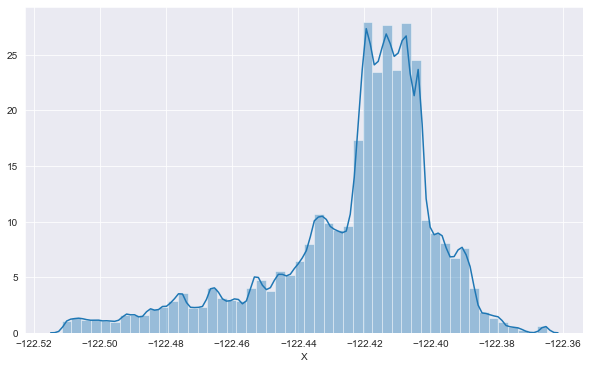

In [80]:
sns.distplot(dataset['X'])

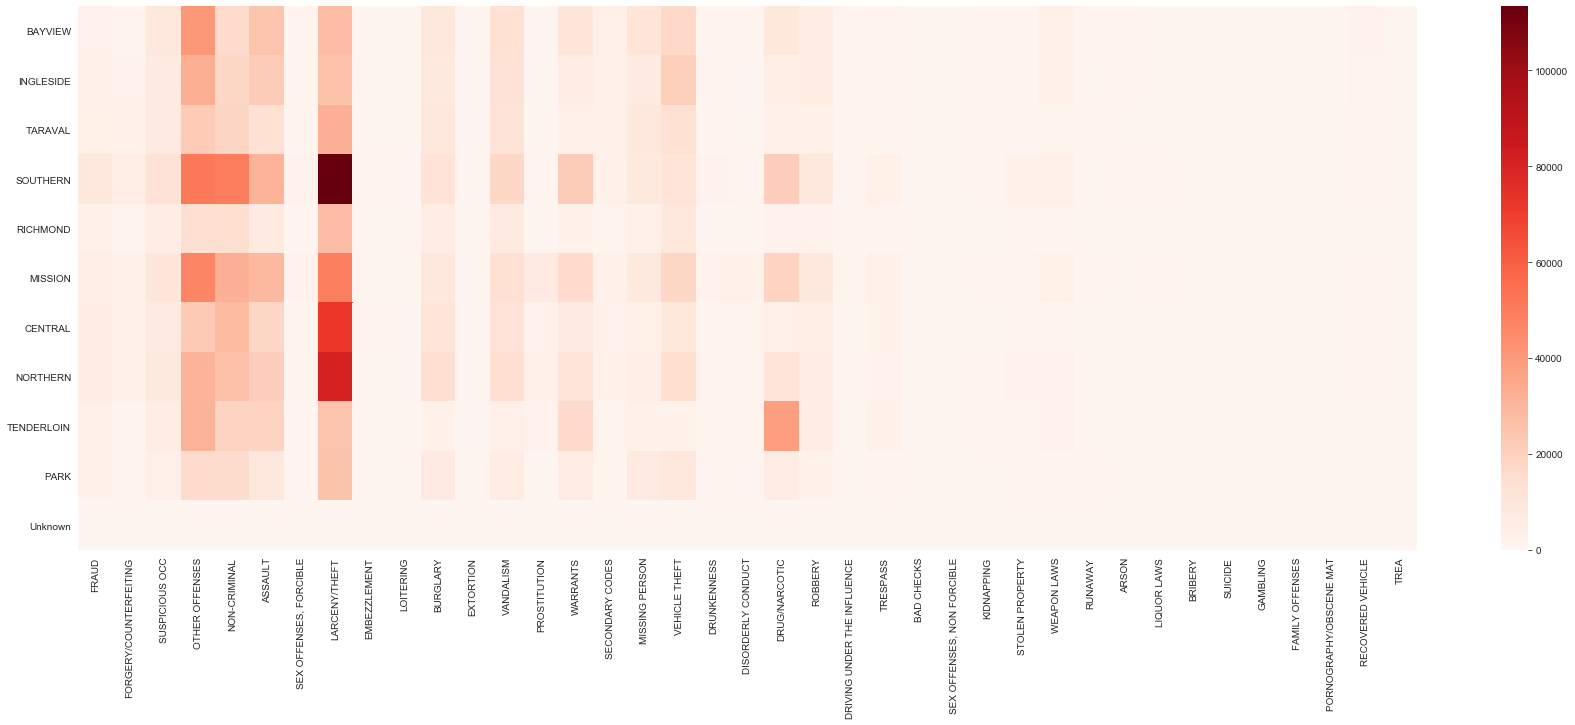

In [30]:
categories = dataset['Category'].unique()
districts = dataset['PdDistrict'].unique()
tarray = []
for distr in districts:
    sub_array = []
    for catgr in categories:
        sub_array.append(len(dataset[(dataset['Category'] == catgr) & (dataset['PdDistrict'] == distr)]))
    tarray.append(sub_array)

fig, ax = plt.subplots(1, 1, figsize =(30,10))
heat_df = pd.DataFrame(tarray, index=districts, columns=categories)
sns.heatmap(heat_df, cmap='Reds')



In [31]:
pd.set_option('float_format', '{:f}'.format)

In [99]:
dataset.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year
248766,50753390,FRAUD,FRAUDULENT CREDIT APPLICATION,Wednesday,2003-01-01,00:01,BAYVIEW,NONE,0 Block of OSCEOLA LN,-122.383085,37.731752,POINT (-122.383085144615 37.7317523387371),5075339009340,January,2003
254250,51362409,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Wednesday,2003-01-01,00:01,INGLESIDE,NOT PROSECUTED,5500 Block of MISSION ST,-122.445418,37.712075,POINT (-122.445418223794 37.7120747965978),5136240909020,January,2003
259998,30322341,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:01,TARAVAL,UNFOUNDED,1700 Block of 21ST AV,-122.478748,37.755059,POINT (-122.478747875056 37.7550587958463),3032234164070,January,2003
264392,41416367,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Wednesday,2003-01-01,00:01,BAYVIEW,NONE,500 Block of HOLYOKE ST,-122.407721,37.724547,POINT (-122.40772139488 37.7245472609848),4141636719050,January,2003
274867,40232138,FRAUD,"FALSE PRETENSES, GRAND THEFT",Wednesday,2003-01-01,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),4023213810125,January,2003


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213165 entries, 248766 to 1944480
Data columns (total 15 columns):
IncidntNum    int64
Category      category
Descript      object
DayOfWeek     category
Date          datetime64[ns]
Time          object
PdDistrict    category
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
Month         category
Year          category
dtypes: category(5), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 196.3+ MB


In [92]:
dataset.describe()

,IncidntNum,X,Y,PdId
count,2213165.000000,2213165.000000,2213165.000000,2213165.000000
mean,104045027.498932,-122.422938,37.767382,10404502777658.962891
std,46121540.847544,0.025408,0.024098,4612154084738.957031
min,3979.000000,-122.511661,37.707879,397963010.000000
25%,61238862.000000,-122.433156,37.753004,6123886219057.000000
50%,101150419.000000,-122.416578,37.775421,10115041906244.000000
75%,140919563.000000,-122.406866,37.784477,14091956371024.000000
max,991582377.000000,-122.364751,37.820621,99158237763010.000000


In [102]:
dataset.describe(include=('object', 'category'))

,Category,Descript,DayOfWeek,Time,PdDistrict,Resolution,Address,Location,Month,Year
count,2213165,2213165,2213165,2213165,2213165,2213165,2213165,2213165,2213165,2213165
unique,39,915,7,1439,11,17,25086,61421,12,16
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,POINT (-122.403404791479 37.775420706711),January,2015
freq,478999,177700,337642,57163,399762,1387790,65267,55669,197441,156296


In [32]:

export_csv = dataset.to_csv (r'./crimedata.csv', index = None, header=True)

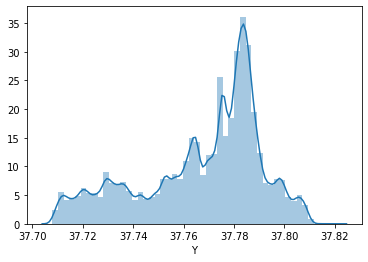

In [111]:
sns.distplot(dataset['Y'])

In [103]:
a['grid_x']   = np.floor((a['X'] - lon_range[0]) / (lon_range[1] - lon_range[0]) * lon_cells).astype(int)
a['grid_y']   = np.floor((a['Y']  - lat_range[0]) / (lat_range[1] - lat_range[0]) * lat_cells).astype(int)

In [105]:
# The cell_id column will be used to link our aggregate data to the grid GeoJSON object for plotting
a['cell_id']  = a[['grid_x','grid_y']].apply(lambda x: '{:02d}_{:02d}'.format(x.grid_x, x.grid_y), axis=1)

In [33]:
a.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year
248766,50753390,FRAUD,FRAUDULENT CREDIT APPLICATION,Wednesday,2003-01-01,00:01,BAYVIEW,NONE,0 Block of OSCEOLA LN,-122.383085,37.731752,POINT (-122.383085144615 37.7317523387371),5075339009340,January,2003
254250,51362409,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Wednesday,2003-01-01,00:01,INGLESIDE,NOT PROSECUTED,5500 Block of MISSION ST,-122.445418,37.712075,POINT (-122.445418223794 37.7120747965978),5136240909020,January,2003
259998,30322341,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,00:01,TARAVAL,UNFOUNDED,1700 Block of 21ST AV,-122.478748,37.755059,POINT (-122.478747875056 37.7550587958463),3032234164070,January,2003
264392,41416367,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Wednesday,2003-01-01,00:01,BAYVIEW,NONE,500 Block of HOLYOKE ST,-122.407721,37.724547,POINT (-122.40772139488 37.7245472609848),4141636719050,January,2003
274867,40232138,FRAUD,"FALSE PRETENSES, GRAND THEFT",Wednesday,2003-01-01,00:01,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),4023213810125,January,2003


In [70]:
m = data[(data['Category']=='WARRANTS')]

In [71]:
m

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year
1652439,40165313,WARRANTS,WARRANT ARREST,Wednesday,2003-01-01,00:01,SOUTHERN,"ARREST, BOOKED",500 Block of 2ND ST,-122.392671,37.782399,POINT (-122.39267083933 37.7823985353293),4016531363010,January,2003
1255096,30000387,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,2003-01-01,02:00,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 6TH ST,-122.402528,37.776038,POINT (-122.402527594672 37.7760382838117),3000038762050,January,2003
848559,30000694,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,2003-01-01,02:18,SOUTHERN,"ARREST, BOOKED",1900 Block of MARKET ST,-122.425669,37.770245,POINT (-122.425669041358 37.7702451976438),3000069462050,January,2003
1094838,30000741,WARRANTS,WARRANT ARREST,Wednesday,2003-01-01,02:49,SOUTHERN,"ARREST, BOOKED",6TH ST / MARKET ST,-122.410294,37.782231,POINT (-122.410293519697 37.7822305869807),3000074163010,January,2003
1625595,30000757,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,2003-01-01,02:50,CENTRAL,"ARREST, BOOKED",400 Block of BROADWAY ST,-122.404282,37.798225,POINT (-122.404282497745 37.7982249345487),3000075762050,January,2003
1660044,30001006,WARRANTS,WARRANT ARREST,Wednesday,2003-01-01,03:41,INGLESIDE,"ARREST, BOOKED",1600 Block of DOLORES ST,-122.424120,37.742645,POINT (-122.424119996263 37.7426453576384),3000100663010,January,2003
1383809,30001272,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,2003-01-01,06:32,SOUTHERN,"ARREST, BOOKED",400 Block of 6TH ST,-122.402984,37.776328,POINT (-122.402983634198 37.7763280295782),3000127262050,January,2003
259215,30002872,WARRANTS,WARRANT ARREST,Wednesday,2003-01-01,07:18,BAYVIEW,"ARREST, BOOKED",1600 Block of QUESADA AV,-122.390479,37.732721,POINT (-122.390478529234 37.7327208838049),3000287263010,January,2003
693778,30002872,WARRANTS,ENROUTE TO ADULT AUTHORITY,Wednesday,2003-01-01,07:18,BAYVIEW,"ARREST, BOOKED",1600 Block of QUESADA AV,-122.390479,37.732721,POINT (-122.390478529234 37.7327208838049),3000287262060,January,2003
1362796,30002872,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Wednesday,2003-01-01,07:18,BAYVIEW,"ARREST, BOOKED",1600 Block of QUESADA AV,-122.390479,37.732721,POINT (-122.390478529234 37.7327208838049),3000287262050,January,2003


In [37]:
n = data[(data['Category']=='NON-CRIMINAL')]

In [38]:
n

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year
283733,30018409,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,RICHMOND,NONE,GEARY BL / 17TH AV,-122.476169,37.780475,POINT (-122.476169109518 37.7804745331212),3001840971000,January,2003
418178,30064606,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,CENTRAL,NONE,800 Block of VALLEJO ST,-122.411281,37.798213,POINT (-122.411280852294 37.798212742643),3006460671000,January,2003
575888,80369638,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,INGLESIDE,NONE,400 Block of MUNICH ST,-122.428653,37.718557,POINT (-122.428653050372 37.7185565501906),8036963871000,January,2003
847939,30822153,NON-CRIMINAL,FOUND PROPERTY,Wednesday,2003-01-01,00:01,MISSION,NONE,1800 Block of 15TH ST,-122.425864,37.766254,POINT (-122.425864046062 37.7662536102334),3082215372000,January,2003
925894,30365034,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,RICHMOND,NONE,10TH AV / GEARY BL,-122.468564,37.780822,POINT (-122.468564162408 37.7808215195192),3036503471000,January,2003
931915,30000638,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,BAYVIEW,NONE,3RD ST / CARGO WY,-122.387178,37.746157,POINT (-122.387177992928 37.7461569686668),3000063871000,January,2003
1144286,40306830,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,BAYVIEW,NONE,2000 Block of MC KINNON AV,-122.397700,37.740576,POINT (-122.397699990974 37.74057569497),4030683071000,January,2003
1274806,50076512,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,INGLESIDE,NONE,0 Block of JOOST AV,-122.436850,37.732325,POINT (-122.436849840662 37.7323249727755),5007651271000,January,2003
1504089,30010063,NON-CRIMINAL,"DEATH REPORT, CAUSE UNKNOWN",Wednesday,2003-01-01,00:01,SOUTHERN,NONE,0 Block of 9TH ST,-122.415065,37.776435,POINT (-122.415064887666 37.7764354063246),3001006361030,January,2003
1615563,30011237,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,00:01,CENTRAL,NONE,400 Block of BROADWAY ST,-122.405065,37.798013,POINT (-122.405065483077 37.7980134745487),3001123771000,January,2003


In [34]:
dataset.Location.plot()


TypeError: Empty 'DataFrame': no numeric data to plot

In [86]:
a.Y.max()

37.820620838070205

In [89]:
lon_range = (-122.51166082373501, -122.364750704393)
lon_cells = 15

lat_range = (37.7078790224135, 37.820620838070205)
lat_cells = 13

In [91]:
from shapely.geometry import Polygon
lon_incr = (lon_range[1] - lon_range[0]) / lon_cells
lat_incr = (lat_range[1] - lat_range[0]) / lat_cells
x0, y0 = lon_range[0], lat_range[0]

cell_ids = []
grid_cells = []
for c in range(lon_cells):
    x1 = x0 + lon_incr
    for r in range(lat_cells):
        y1 = y0 + lat_incr
        grid_cells.append(Polygon([(x0,y0),(x0,y1),(x1,y1),(x1,y0)]))
        cell_ids.append('{:02d}_{:02d}'.format(c, r))
        y0 = y1
    x0 = x1
    y0 = lat_range[0]

In [93]:
a.shape

(2213165, 15)

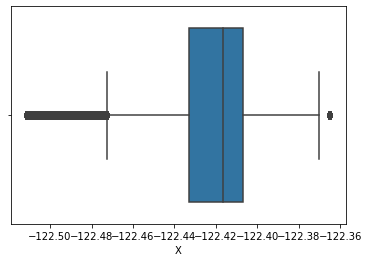

In [94]:
sns.boxplot(a['X'])

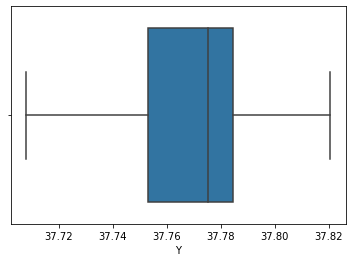

In [97]:
sns.boxplot(a['Y'])

In [ ]:
data.Category.value_counts()

from fancyimpute import KNN    
 X is the complete data matrix
 X_incomplete has the same values as X except a subset have been replace with NaN

 Use 3 nearest rows which have a feature to fill in each row's missing features
X_filled_knn = KNN(k=3).complete(data['PdDistrict'])

knn_impute(target=df['Age'], attributes=df.drop(['Age', 'PassengerId'], 1),
                                    aggregation_method="median", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.8)


In [70]:
a

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Month,Year
248766,50753390,FRAUD,FRAUDULENT CREDIT APPLICATION,Wednesday,2003-01-01,2019-12-18 00:01:00,BAYVIEW,NONE,0 Block of OSCEOLA LN,-122.383085,37.731752,POINT (-122.383085144615 37.7317523387371),5075339009340,January,2003
254250,51362409,FORGERY/COUNTERFEITING,"CHECKS, MAKE OR PASS FICTITIOUS",Wednesday,2003-01-01,2019-12-18 00:01:00,INGLESIDE,NOT PROSECUTED,5500 Block of MISSION ST,-122.445418,37.712075,POINT (-122.445418223794 37.7120747965978),5136240909020,January,2003
259998,30322341,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Wednesday,2003-01-01,2019-12-18 00:01:00,TARAVAL,UNFOUNDED,1700 Block of 21ST AV,-122.478748,37.755059,POINT (-122.478747875056 37.7550587958463),3032234164070,January,2003
264392,41416367,OTHER OFFENSES,OBSCENE PHONE CALLS(S),Wednesday,2003-01-01,2019-12-18 00:01:00,BAYVIEW,NONE,500 Block of HOLYOKE ST,-122.407721,37.724547,POINT (-122.40772139488 37.7245472609848),4141636719050,January,2003
274867,40232138,FRAUD,"FALSE PRETENSES, GRAND THEFT",Wednesday,2003-01-01,2019-12-18 00:01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),4023213810125,January,2003
283733,30018409,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,2019-12-18 00:01:00,RICHMOND,NONE,GEARY BL / 17TH AV,-122.476169,37.780475,POINT (-122.476169109518 37.7804745331212),3001840971000,January,2003
305348,50569200,ASSAULT,THREATS AGAINST LIFE,Wednesday,2003-01-01,2019-12-18 00:01:00,INGLESIDE,NONE,0 Block of 27TH ST,-122.421899,37.747146,POINT (-122.421898736352 37.747145943185),5056920019057,January,2003
382683,21623770,ASSAULT,CHILD ABUSE (PHYSICAL),Wednesday,2003-01-01,2019-12-18 00:01:00,MISSION,UNFOUNDED,2600 Block of BRYANT ST,-122.408983,37.751987,POINT (-122.408983439759 37.751987040935),2162377015015,January,2003
389183,30063216,FORGERY/COUNTERFEITING,"CHECKS, FORGERY (FELONY)",Wednesday,2003-01-01,2019-12-18 00:01:00,BAYVIEW,NONE,100 Block of DAKOTA ST,-122.395635,37.753565,POINT (-122.395635436168 37.7535645746594),3006321609015,January,2003
418178,30064606,NON-CRIMINAL,LOST PROPERTY,Wednesday,2003-01-01,2019-12-18 00:01:00,CENTRAL,NONE,800 Block of VALLEJO ST,-122.411281,37.798213,POINT (-122.411280852294 37.798212742643),3006460671000,January,2003


In [53]:
type(data['coordinates'])#checking type of coordinates

pandas.core.series.Series

In [54]:
dataset = geopandas.GeoDataFrame(data, geometry='coordinates')
dataset.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,year,date,hour,minute,coordinates
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,May,2015,2015-05-13,23,53,POINT (-122.42589 37.77460)
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,May,2015,2015-05-13,23,53,POINT (-122.42589 37.77460)
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,May,2015,2015-05-13,23,33,POINT (-122.42436 37.80041)
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,May,2015,2015-05-13,23,30,POINT (-122.42700 37.80087)
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,May,2015,2015-05-13,23,30,POINT (-122.43874 37.77154)


In [55]:
type(dataset)

geopandas.geodataframe.GeoDataFrame

In [56]:
type(dataset['coordinates'])

geopandas.geoseries.GeoSeries

In [58]:
m = dataset[(dataset.Category=='LARCENY/THEFT')]

In [59]:
m.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,year,date,hour,minute,coordinates
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,May,2015,2015-05-13,23,30,POINT (-122.42700 37.80087)
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,May,2015,2015-05-13,23,30,POINT (-122.43874 37.77154)
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,May,2015,2015-05-13,23,30,POINT (-122.40325 37.71343)
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,May,2015,2015-05-13,23,0,POINT (-122.50819 37.77660)
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,May,2015,2015-05-13,23,0,POINT (-122.41909 37.80780)


In [61]:
n = dataset.groupby('Category').Descript.count()

In [62]:
n

Category
ARSON                            1512
ASSAULT                         76815
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36600
DISORDERLY CONDUCT               4313
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53919
DRUNKENNESS                      4277
EMBEZZLEMENT                     1164
EXTORTION                         256
FAMILY OFFENSES                   488
FORGERY/COUNTERFEITING          10592
FRAUD                           16637
GAMBLING                          146
KIDNAPPING                       2340
LARCENY/THEFT                  174320
LIQUOR LAWS                      1899
LOITERING                        1207
MISSING PERSON                  25669
NON-CRIMINAL                    91915
OTHER OFFENSES                 125960
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7446
RECOVERED VEHICLE                3132
ROBBERY                         22988
RUN

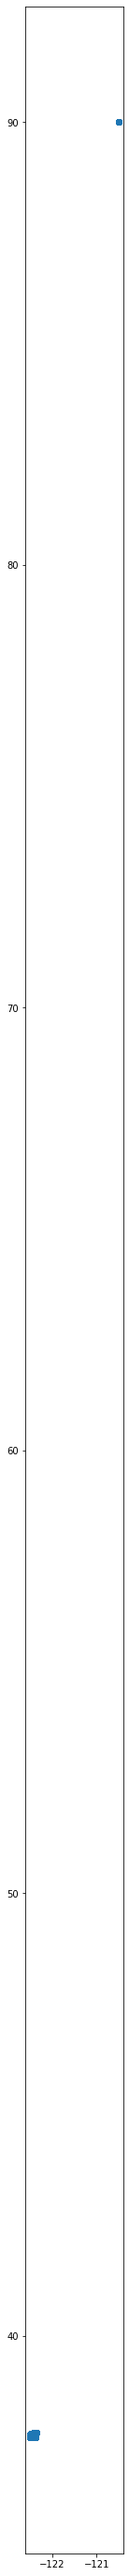

In [64]:
dataset.plot(figsize=(50,50));

In [39]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

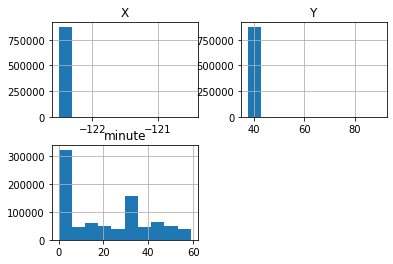

In [35]:
import matplotlib.pyplot as plt

data.hist()
plt.show()

In [ ]:
channelsDateTopic = channels[['publishedAt', 'channelTopic']].groupby([pd.Grouper(key='publishedAt', freq='M'), 'channelTopic']).size()
channelsDateTopic = channelsDateTopic.to_frame(name='count').reset_index()
channelsDateTopicSpread = channelsDateTopic.pivot(index = 'publishedAt', columns='channelTopic', values='count')
channelsDateTopicCumSum = channelsDateTopicSpread.fillna(0).cumsum()
channelsDateTopicCumSum.head()

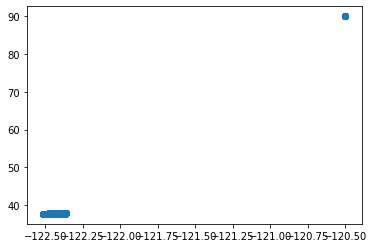

In [65]:
plt.scatter(data.X, data.Y)

In [38]:
data.Address.nunique()

23228

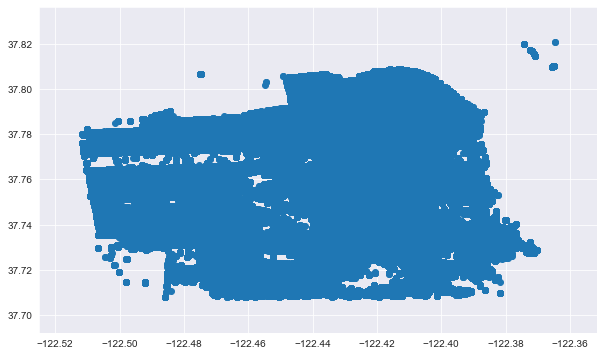

In [109]:
import seaborn as sns
plt.scatter(dataset.X, dataset.Y)

In [71]:
t = data.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

,Neighborhood,Count
0,CENTRAL,85267
1,NORTHERN,105105
2,PARK,49161
3,SOUTHERN,156528
4,MISSION,119723
5,TENDERLOIN,81642
6,RICHMOND,45080
7,TARAVAL,65400
8,INGLESIDE,78722
9,BAYVIEW,89098


In [73]:
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [72]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

In [67]:
a = data[(data.PdDistrict==district]

SyntaxError: invalid syntax (<ipython-input-67-c072be5d1fb0>, line 1)

In [ ]:
sfc[(sfc['Category'] == 'NON-CRIMINAL') & (sfc['Resolution'].str.contains('ARREST'))]

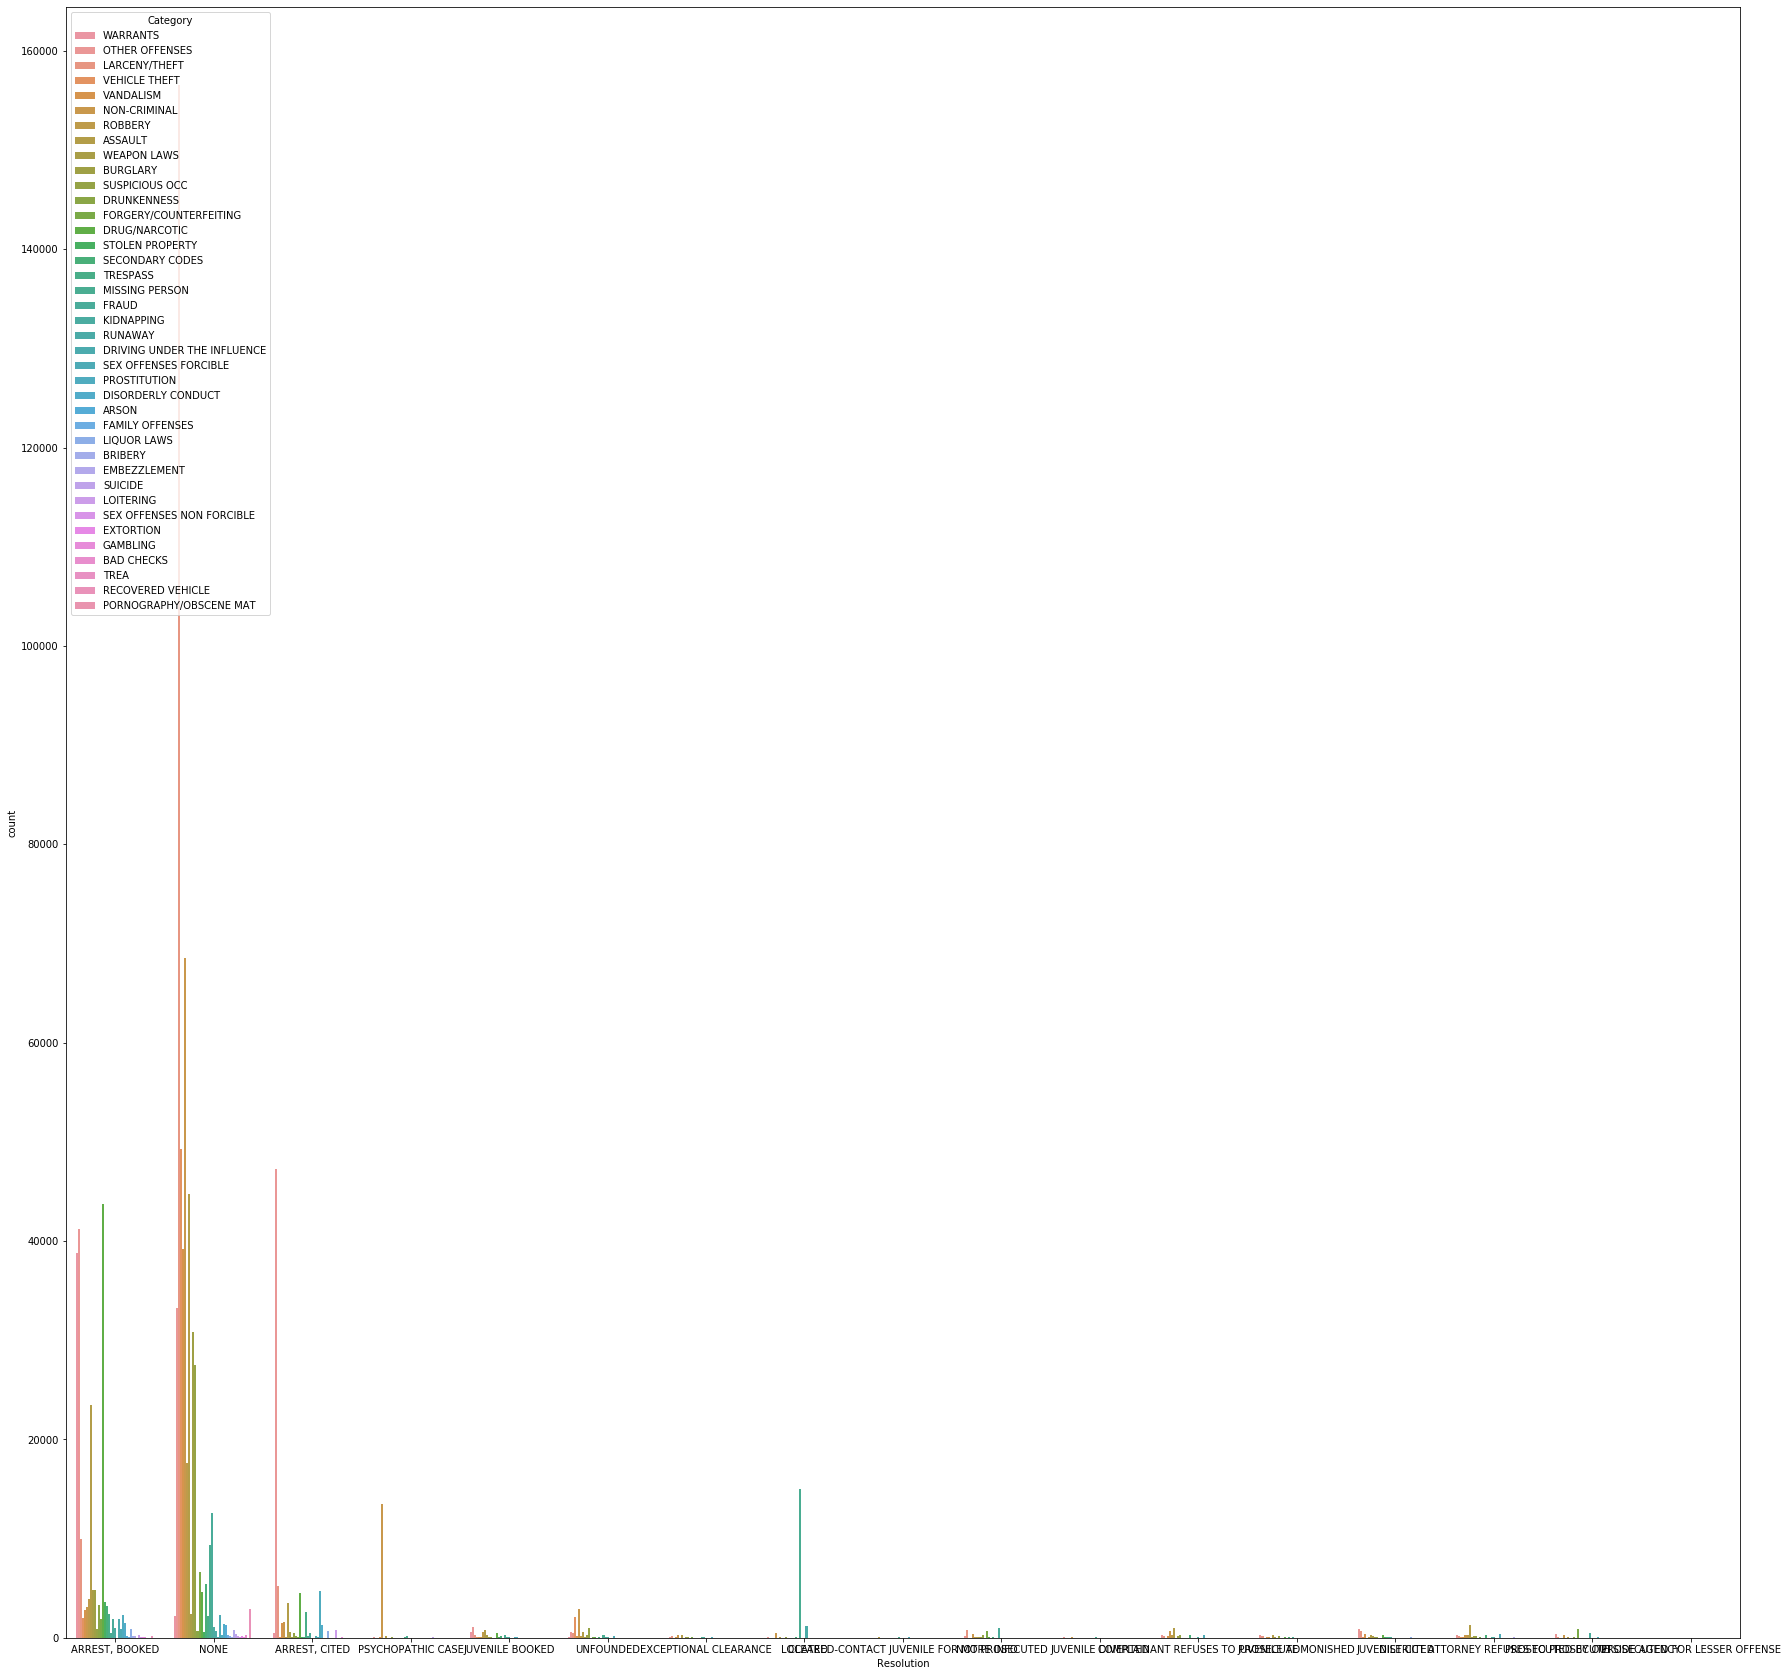

In [52]:
_, axes = plt.subplots(1, 1, sharey=True, figsize=(30, 30))

sns.countplot(x='Resolution', hue='Category', data = data, ax=axes);

In [47]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,5
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,5


In [53]:
data.Address = data.Address.str.replace('\d+', '')

In [54]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,year,date,hour,minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015,2015-05-13,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,5,2015,2015-05-13,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,5,2015,2015-05-13,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,Block of LOMBARD ST,-122.426995,37.800873,5,2015,2015-05-13,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,Block of BRODERICK ST,-122.438738,37.771541,5,2015,2015-05-13,23,30


In [43]:
data.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [6]:
data.Category.nunique()

39

In [7]:
data.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO                            60022
LOST PROPERTY                                           31729
BATTERY                                                 27441
STOLEN AUTOMOBILE                                       26897
DRIVERS LICENSE, SUSPENDED OR REVOKED                   26839
WARRANT ARREST                                          23754
SUSPICIOUS OCCURRENCE                                   21891
AIDED CASE, MENTAL DISTURBED                            21497
PETTY THEFT FROM LOCKED AUTO                            19771
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES               17789
TRAFFIC VIOLATION                                       16471
PETTY THEFT OF PROPERTY                                 16196
MALICIOUS MISCHIEF, VANDALISM                           15957
THREATS AGAINST LIFE                                    14716
FOUND PROPERTY                                          12146
ENROUTE TO OUTSIDE JURISDICTION                         11470
GRAND TH

In [8]:
data.DayOfWeek.value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [10]:
data.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [11]:
data.PdDistrict.nunique()

10

In [12]:
data.Resolution.value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [13]:
data.Resolution.nunique()

17

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import folium as fm
from shapely.geometry import Polygon

from math import radians, asin, sqrt, sin, cos, log, log10

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from collections import Counter

from IPython.core.display import Markdown, display, HTML

In [4]:
# Use in-line date string conversion/parsing, it is significantly more effective than applying pd.to_datetime() on a dataframe column post-loading
def dt_parse(timestamp_str):
    return pd.to_datetime(timestamp_str, format='%Y%m%d %H:%M:%S', errors='coerce')

def printmd(string):
    display(Markdown(string))
    
# 12-step qualitative color scale, courtesy of www.colorbrewer2.org
clust_colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

# 9-step continuous ordered color scale "OrdRd", courtesy of www.colorbrewer2.org
cb2_ordrd = ['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000']
# Same color scale, as rgb tuples for easier interpolation
cb2_ordrd_rgb = [(255,247,236), (254,232,200), (253,212,158), (253,187,132), (252,141,89), (239,101,72), (215,48,31), (179,0,0), (127,0,0)]

In [5]:
# setup the screen display
%matplotlib inline
pd.options.display.max_columns = 200
#display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("""<style>
  .rendered_html tr, .rendered_html th,  .rendered_html td {   text-align: right; }  
  .rendered_html :first-child {   text-align: left; } 
  .rendered_html :last-child {   text-align: left; }
  </style>"""))

# Tweak default output of pyplots
screen_dpi = plt.rcParams['figure.dpi']
# 'figsize' is in inches, so convert desired default figure size in pixels into inches using the given sceen dpi 
plt.rcParams["figure.figsize"] = [800/screen_dpi,600/screen_dpi]

In [6]:
data.describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [7]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,13/05/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,13/05/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,13/05/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,13/05/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,13/05/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [84]:
b = data[(data.PdDistrict=='BAYVIEW')]

In [85]:
b.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,month,year,date,hour,minute
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,5,2015,2015-05-13,23,30
14,2015-05-13 22:00:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,BAYVIEW,NONE,Block of WILLIAMS AV,-122.397744,37.729935,5,2015,2015-05-13,22,0
15,2015-05-13 22:00:00,NON-CRIMINAL,FOUND PROPERTY,Wednesday,BAYVIEW,NONE,Block of MENDELL ST,-122.383691,37.743189,5,2015,2015-05-13,22,0
18,2015-05-13 21:40:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,BAYVIEW,"ARREST, BOOKED",MENDELL ST / HUDSON AV,-122.386401,37.738983,5,2015,2015-05-13,21,40
43,2015-05-13 20:06:00,OTHER OFFENSES,PROBATION VIOLATION,Wednesday,BAYVIEW,"ARREST, BOOKED",Block of WILLIAMS AV,-122.399444,37.730176,5,2015,2015-05-13,20,6


In [86]:
min(b.X)

-122.4852835

In [81]:
max(b.X)

-120.5

In [82]:
min(b.Y)

37.71869469

In [83]:
max(b.Y)

90.0

In [78]:
data.PdDistrict.value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [79]:
data.X.value_counts()

-122.403405    26354
-122.419658     4449
-122.406539     3891
-122.419672     3804
-122.407634     3170
-122.409854     2533
-122.406521     2329
-122.466205     2182
-122.410769     2167
-122.410294     2116
-122.475648     2019
-122.426956     1993
-122.407244     1954
-122.412515     1724
-122.414056     1709
-122.452290     1696
-122.413564     1658
-122.394439     1622
-122.411071     1609
-122.408068     1598
-122.412784     1532
-122.413609     1491
-122.411966     1439
-122.410774     1398
-122.407845     1380
-122.418448     1341
-122.413870     1300
-122.365565     1300
-122.409530     1269
-122.411988     1264
               ...  
-122.463322        1
-122.407618        1
-122.392397        1
-122.494041        1
-122.505084        1
-122.415137        1
-122.470007        1
-122.481816        1
-122.394037        1
-122.408543        1
-122.448384        1
-122.397136        1
-122.400397        1
-122.475361        1
-122.467847        1
-122.421177        1
-122.415511  